In [1]:
import random
import string
from operator import add

In [2]:
import numpy as np
import wordcloud
from matplotlib import pyplot as plt
from pyspark import SparkContext, SparkConf
from nltk.tokenize import word_tokenize, RegexpTokenizer

---

In [3]:
INPUT_TEXT = 'tale.txt'
N_WORD_SAMPLES = 10

---

In [4]:
sc = SparkContext("local")

In [5]:
src_text = sc.textFile(INPUT_TEXT)
tokenizer = RegexpTokenizer(r'\w+')

In [6]:
result_rdd = src_text.flatMap(lambda line: [x.lower() for x in tokenizer.tokenize(line)]) \
                     .map(lambda x: (x, 1)) \
                     .reduceByKey(add) 

In [7]:
frequencies = {word: freq for word, freq in result_rdd.collect()}

In [8]:
random_words = random.sample(frequencies.keys(), N_WORD_SAMPLES)
{word: frequencies[word] for word in random_words}

{'end': 1,
 'been': 1,
 'found': 1,
 'middle': 2,
 'work': 12,
 'not': 5,
 'will': 3,
 'morning': 3,
 'than': 1,
 'at': 7}

---

In [9]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [10]:
wc_instance = wordcloud.WordCloud(background_color='white', mask=mask)

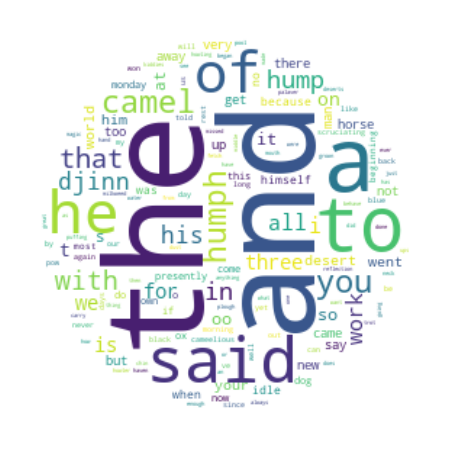

In [11]:
img = wc_instance.generate_from_frequencies(frequencies)

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(img, interpolation='bilinear')
plt.show()